## Bootstrapping

The basic idea in boostrapping is to create an ensemble of data sets with the same size as the original data by sampling the original data with repalcement. This allows us, among other things, to calculate confindence intervals for any statistic. Here I'm going to use the same dataset we used in cross-validation to calculate a standard deviation of the parameters of the fit. 

In [4]:
import pandas as pd
import numpy as np
import random
import seaborn
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
auto = pd.read_csv('data/auto.csv')
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,3,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,4,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,5,17,8,302,140,3449,10.5,70,1,ford torino


In [6]:
X = auto[['horsepower']].values
y = auto.mpg.values

In [15]:
poly = PolynomialFeatures(degree=2)
n_iter = 10000
coefArray = np.zeros(shape=(n_iter,3))
for i in range(n_iter):
    i_train = np.random.randint(len(y),size=len(y)) #sampling from the original data set with replacement
    X_train, y_train = X[i_train], y[i_train]
    X_trans = poly.fit_transform(X_train)
    lf = linear_model.LinearRegression()
    lf.fit(X_trans,y_train)
    
    #Calculate coefficients
    coef = lf.coef_
    coef[0] = lf.intercept_
    coefArray[i] = coef

So, we fitted a second degree polynomial using 1000 different data sets. No we can look at the statistics of the fit coeficients:

In [16]:
print np.mean(coefArray,axis = 0)
print np.std(coefArray,axis=0)
# confidence intervals 
print np.percentile(coefArray,97.5, axis=0)
print np.percentile(coefArray,2.5, axis=0)

[  5.69528358e+01  -4.67124550e-01   1.23427058e-03]
[  2.08383310e+00   3.32803010e-02   1.20425670e-04]
[  6.09380798e+01  -4.00528643e-01   1.46504002e-03]
[  5.27680065e+01  -5.30892762e-01   9.93997387e-04]


We can look, for example, at the distribution of the one of the coefficients:

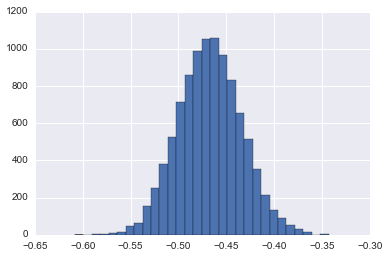

In [18]:
plt.hist(coefArray[:,1],30); 